## Objective: Predict the house price of a given house based on specific features.

#### Import modules and prepare dataset.

In [1]:
# Import sklearn modules.
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from random import choice
%matplotlib inline

# Import other modules.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time
from IPython.display import display
from scipy.special import expit

dataset = load_boston()    # Predicting boston house prices.

data = dataset.data
target = dataset.target

print(data.shape)
print(target.shape)

# Check for NaN values in data.
print(np.isnan(np.sum(data)))    # -> False

X_train, X_test, y_train, y_test = train_test_split(data, target)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

(506, 13)
(506,)
False
X_train.shape: (379, 13)
y_train.shape: (379,)
X_test.shape: (127, 13)
y_test.shape: (127,)


#### Visualize the data

% of zeros in data -> 12.82%


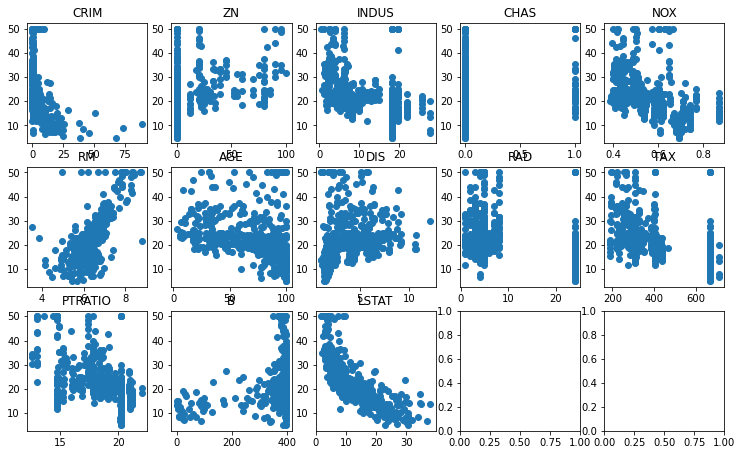

In [2]:
print(f'% of zeros in data -> {(np.sum(data == 0)/data.size)*100:.2f}%')


fig, axs = plt.subplots(3, 5, figsize=(12.5, 7.5))
features = dataset.feature_names

axs = [ax for ax in axs.ravel()]

for i in range(len(features)):
    axs[i].scatter(data[:, i], target)
    axs[i].set_title(features[i])

# NOTE: It seems like the is not much correlation between the target and most features.
#       This means that model should partly eliminate some features
#       so that only the most important features are used.

#### Use linear model on the data.

In [3]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

lin_pred_train = linreg.predict(X_train)
lin_pred_test = linreg.predict(X_test)

print(f'Train MSE: {mean_squared_error(y_train, lin_pred_train):.2f}')
print(f'Test MSE: {mean_squared_error(y_test, lin_pred_test):.2f}')
print(f'Train R^2 Score: {r2_score(y_train, lin_pred_train)*100:.2f}%')
print(f'Test R^2 Score: {r2_score(y_test, lin_pred_test)*100:.2f}%')

Train MSE: 20.06
Test MSE: 27.53
Train R^2 Score: 74.89%
Test R^2 Score: 71.87%


#### Use different algorithm that will generalize to the data better

In [4]:
# Edit data to make features polynomial.
quadratic = PolynomialFeatures()

X_train_poly = quadratic.fit_transform(X_train)
X_test_poly = quadratic.transform(X_test)

lasso = Ridge(alpha=50)

lasso.fit(X_train_poly, y_train)

# NOTE: The reason why we use polynomial features is because the features that are 
#       somewhat correlated to the target variable appear to be better fit through
#       a polynomial model.

lasso_pred_train = lasso.predict(X_train_poly)
lasso_pred_test = lasso.predict(X_test_poly)

print(f'Train MSE: {mean_squared_error(y_train, lasso_pred_train):.2f}')
print(f'Test MSE: {mean_squared_error(y_test, lasso_pred_test):.2f}')
print(f'Train R^2 Score: {r2_score(y_train, lasso_pred_train)*100:.2f}%')
print(f'Test R^2 Score: {r2_score(y_test, lasso_pred_test)*100:.2f}%')

Train MSE: 8.14
Test MSE: 15.18
Train R^2 Score: 89.81%
Test R^2 Score: 84.49%


#### View the results of the algorithm

In [9]:
sample_target = choice(y_test)
sample_index = np.where(y_test == sample_target)

lin_sample_pred = np.mean(linreg.predict(X_test[sample_index]))
lasso_samples_pred = np.mean(lasso.predict(X_test_poly[sample_index]))

print(f'linreg Predicted Price: {lin_sample_pred:.1f}')
print(f'lasso Predicted Price: {lasso_samples_pred:.1f}')
print(f'Target Price: {sample_target}')


linreg Predicted Price: 37.2
lasso Predicted Price: 44.3
Target Price: 50.0


#### Plot the results

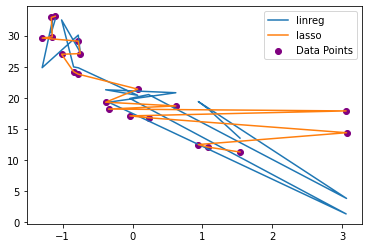

In [8]:
indexes, i = ([], 5)

while len(indexes) < 20:
    
    if len(np.where(y_test == y_test[i])[0]) == 1:
        indexes.append(i)
    
    i += 1

samples_target = sorted(y_test[indexes])

indexes_sorted = []

for t in samples_target:
    indexes_sorted.append(np.where(y_test == t)[0][0])

samples = X_test[indexes_sorted]

samples_pred = {
    'lasso': lasso.predict(quadratic.transform(samples)),
    'lin': linreg.predict(samples)
}

plt.scatter(
    samples[:, 12],
    samples_target,
    label='Data Points', color='purple'
)

plt.plot(
    samples[:, 12],
    samples_pred['lin'],
    label='linreg'
)

plt.plot(
    samples[:, 12],
    samples_target,
    label='lasso'
)

plt.legend()